# Target QUALITATIVE

# Import des librairies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import du jeu de données

In [2]:
training_values = pd.read_csv("TrainingValues.csv", sep = ',')
training_labels = pd.read_csv("TrainingLabels.csv", sep = ',')
test = pd.read_csv("Test.csv", sep = ',')
submission_format = pd.read_csv("SubmissionFormat.csv", sep = ',')
training_values.shape

(59400, 40)

# Merge

In [3]:
training = pd.merge(training_values, training_labels, on = "id")

In [4]:
training.index.duplicated().sum()

0

In [5]:
training.shape

(59400, 41)

# Visualisation du jeu de données

In [6]:
training.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Caractéristiques et transformation de la structure du dataframe

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
# Modification du type des variables et création de variables

training["date_recorded"] = pd.to_datetime(training["date_recorded"])
training["year_recorded"] = training["date_recorded"].dt.year
training["month_recorded"] = training["date_recorded"].dt.month

training["construction_year"] = pd.to_datetime(training["construction_year"])
training["construction_year"] = training["construction_year"].dt.year

training['region_code'] = training['region_code'].astype(str)
training['district_code'] = training['district_code'].astype(str)

In [9]:
# Nombre de valeurs uniques

for column in training.columns:
    print(f"{column}: Number of unique values {training[column].nunique()}")
    print("==========================================================")

id: Number of unique values 59400
amount_tsh: Number of unique values 98
date_recorded: Number of unique values 356
funder: Number of unique values 1897
gps_height: Number of unique values 2428
installer: Number of unique values 2145
longitude: Number of unique values 57516
latitude: Number of unique values 57517
wpt_name: Number of unique values 37400
num_private: Number of unique values 65
basin: Number of unique values 9
subvillage: Number of unique values 19287
region: Number of unique values 21
region_code: Number of unique values 27
district_code: Number of unique values 20
lga: Number of unique values 125
ward: Number of unique values 2092
population: Number of unique values 1049
public_meeting: Number of unique values 2
recorded_by: Number of unique values 1
scheme_management: Number of unique values 12
scheme_name: Number of unique values 2696
permit: Number of unique values 2
construction_year: Number of unique values 1
extraction_type: Number of unique values 18
extraction_t

In [10]:
# Suppression des variables avec une valeur unique

training.drop(['construction_year', 'recorded_by'], axis="columns", inplace=True)

In [11]:
# % de valeurs manquantes par colonne

training.isna().mean().round(4) * 100

id                        0.00
amount_tsh                0.00
date_recorded             0.00
funder                    6.12
gps_height                0.00
installer                 6.15
longitude                 0.00
latitude                  0.00
wpt_name                  0.00
num_private               0.00
basin                     0.00
subvillage                0.62
region                    0.00
region_code               0.00
district_code             0.00
lga                       0.00
ward                      0.00
population                0.00
public_meeting            5.61
scheme_management         6.53
scheme_name              47.42
permit                    5.14
extraction_type           0.00
extraction_type_group     0.00
extraction_type_class     0.00
management                0.00
management_group          0.00
payment                   0.00
payment_type              0.00
water_quality             0.00
quality_group             0.00
quantity                  0.00
quantity

In [12]:
# Supression de la variable qui contient plus de 40% de NA

training.drop(['scheme_name'], axis="columns", inplace=True)

In [13]:
# Plus grand nombre de NA sur une ligne

training.isnull().sum(axis=1).nlargest(1)

11968    5
dtype: int64

In [14]:
# Nombre de NA par ligne

training.isnull().sum(axis=1)

0        0
1        1
2        0
3        0
4        1
        ..
59395    0
59396    0
59397    2
59398    0
59399    0
Length: 59400, dtype: int64

In [15]:
# Suppression des lignes avec NA
training.dropna(axis="rows", inplace=True)

In [16]:
# Valeurs uniques

print(training['num_private'].unique())
print(training['status_group'].unique())

[   0   39    5   45    6    3  698   32   15    7   25  102    1   93
   14   34  120   17  213   47    8   41   80  141   20   35  131    4
   22   11   87   65    2  180   38   62    9   16   23   42   24   12
  668  672   58  150  280   50 1776   27   10   94   26  240  755   60
   55 1402]
['functional' 'non functional' 'functional needs repair']


# Principales statistiques

In [17]:
training.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,population,year_recorded,month_recorded
count,48288.000000,48288.000000,48288.000000,48288.000000,4.828800e+04,48288.000000,48288.000000,48288.000000,48288.000000
mean,37138.591203,360.417379,701.494429,34.213824,-5.700627e+00,0.552145,176.683048,2011.902999,4.330123
std,21437.666601,2828.437040,698.811196,6.329288,2.870772e+00,13.291202,472.505399,0.959011,3.002689
min,2.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000,2002.000000,1.000000
25%,18578.750000,0.000000,0.000000,33.039487,-8.251540e+00,0.000000,0.000000,2011.000000,2.000000
50%,37093.500000,0.000000,463.000000,35.212593,-4.986570e+00,0.000000,30.000000,2012.000000,3.000000
75%,55666.250000,50.000000,1335.000000,37.355583,-3.334879e+00,0.000000,200.000000,2013.000000,7.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-2.000000e-08,1776.000000,30500.000000,2013.000000,12.000000


In [18]:
# Détection des outliers et suppression

# from scipy import stats
# training[(np.abs(stats.zscore(training)) < 3).all(axis=1)] pour tout le dataset

training = training[np.abs(training.amount_tsh - training.amount_tsh.mean()) <= (3*training.amount_tsh.std())]
training = training[np.abs(training.num_private - training.num_private.mean()) <= (3*training.num_private.std())]
training = training[np.abs(training.population - training.population.mean()) <= (3*training.population.std())]

# Variables quantitatives

In [19]:
sns.pairplot(training, hue ="status_group");

C:\Users\milie\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\milie\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\milie\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\milie\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\milie\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\milie\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F152C06700> (for post_execute):


KeyboardInterrupt: 

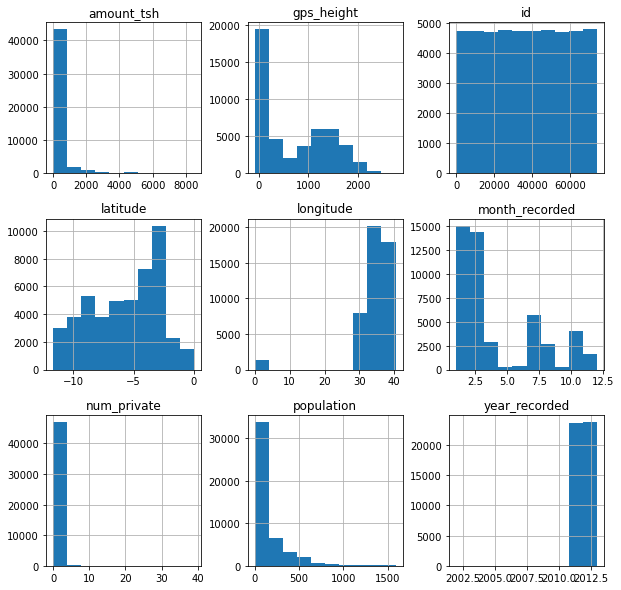

In [20]:
training.hist(figsize = (10,10));

In [21]:
# Amount_tsh moyen par mois et status group

tsh_anneestatus = training.groupby(['status_group','month_recorded']).mean()['amount_tsh'].unstack(level = 0)
tsh_anneestatus

status_group,functional,functional needs repair,non functional
month_recorded,,,
1,387.065049,367.967651,138.791308
2,511.635629,323.549180,174.978439
3,430.604102,222.420635,170.779654
4,212.463296,20.857605,67.191050
5,351.664835,286.571429,19.113208
6,421.665399,388.571429,202.706897
7,122.558083,310.405542,89.713089
8,72.197494,121.800000,42.451365
9,109.268293,222.222222,237.109375


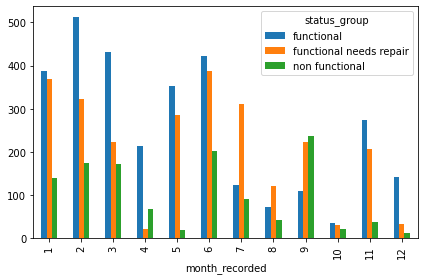

In [22]:
tsh_anneestatus.plot(kind='bar', subplots=False)
plt.tight_layout()

C:\Users\milie\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


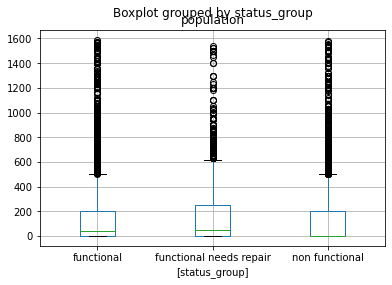

In [23]:
# Population par status group

pop_status = training[['population', 'status_group']]
pop_status.boxplot(by = 'status_group');

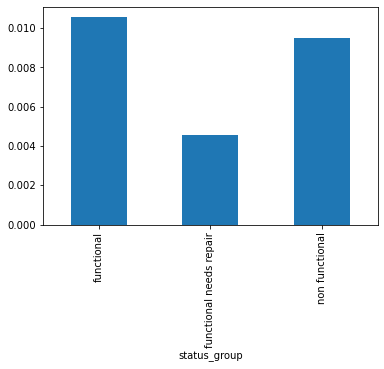

In [312]:
# num_private par status group

numprivate_status = training.groupby('status_group').mean()['num_private']
numprivate_status.plot(kind='bar', subplots=False);

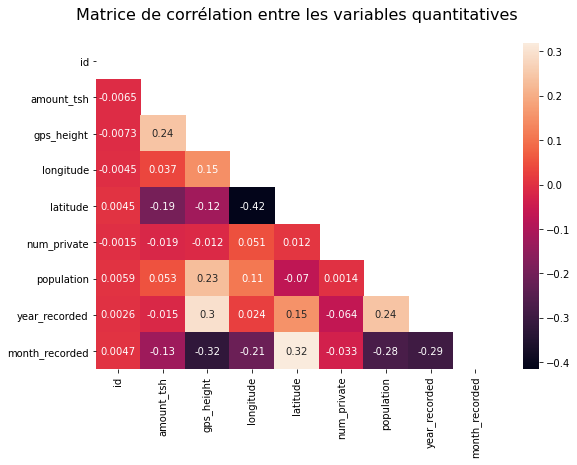

In [24]:
# Matrice de corrélation

matrix = np.triu(training.corr())
plt.subplots(figsize=(9,6))
sns.heatmap(training.corr(), annot=True, mask=matrix)
plt.title("Matrice de corrélation entre les variables quantitatives\n", fontsize=16);

# Attention à la corrélation latitude et longitude

In [442]:
# Graphique qui donne des indications de corrélation entre variables par status-group
# Ne prendre que les variables quanti

# Sélection des variables quantitatives + inclusion de la target
var_quanti = training.select_dtypes(include=['number'])
target_merge = training.loc[:,['id', 'status_group']]
var_quanti = pd.merge(var_quanti, target_merge, on = "id") 
var_quanti

TypeError: string dtypes are not allowed, use 'object' instead

In [447]:
# Corrélation avec la target (quand y quanti)

training["status_group_num"] = training['status_group'].replace(
    ['functionnal', 'non functional', 'functional needs repair'], [2, 0, 1], inplace = True)


target = training["status_group_num"]
cor = training.corr()
cor_target = abs(cor["status_group_num"])
relevant_features = cor_target[cor_target>0.5]

KeyError: 'status_group_num'

# Variables qualitatives

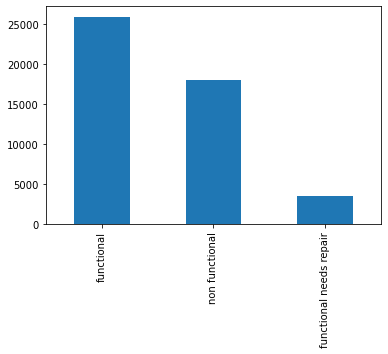

In [25]:
# Nombre de données dans chaque status_group

training['status_group'].value_counts().plot.bar();

In [439]:
# Calcul du chi2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Simplification du dataset (certaines colonnes semblent être redondantes)
X = training.loc[:,['installer', 'basin', 'region', 'lga',
       'public_meeting', 'permit', 'extraction_type_class', 'management_group',
       'payment_type', 'quality_group', 'quantity_group', 'source_type',
       'source_class', 'waterpoint_type_group']]


y = training['status_group']

# Convert to categorical data by converting data to integers
X = pd.get_dummies(X)


#Compare Chi-Squared Statistics
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(X, y)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])


Original number of features: 1942
Reduced number of features: 10


In [ ]:
public_meeting; permit management_group quality_group source_class

In [47]:
# Tableau de contingence et calcul du chi2
# On garde les variables avec la pvaleur la plus faible

X = 'status_group'
Y = 'waterpoint_type_group'

cont = training[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont

import scipy.stats as st
from scipy.stats import chi2_contingency

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
st_p

0.0

# Choix des variables

In [56]:
y = training['status_group']
x = training.loc[:,['month_recorded','amount_tsh','extraction_type_class', 'management_group', 
                    'payment_type', 'quality_group', 'quantity_group', 'source_class',
                    'waterpoint_type_group']]
x = pd.get_dummies(x)

# Arbre de décision

In [57]:
# ARBRE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

clf.fit(x_train, y_train)
clf.predict(x_test)

array(['functional', 'functional', 'non functional', ...,
       'non functional', 'functional', 'non functional'], dtype=object)

In [58]:
#- Calculer les scores
from sklearn.metrics import confusion_matrix
predictions = clf.predict(x_test)
confusion_matrix1 = confusion_matrix(y_test, predictions)
#Taux des bien classés : somme diagonal / somme total 
# Score RMSE si on avait utilisé DecisionTreeRegressor
np.diag(confusion_matrix1).sum() / confusion_matrix1.sum()

0.7527116495281025

In [63]:
# GridSearchCV pour trouver les meilleurs paramètres

from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf': np.arange(1, 10)}

grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv = 5) # cv = cross validation

grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [64]:
grid.best_score_

0.7428381322292399

# Forêt

In [65]:
# FOREST
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=500)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

forest_clf.fit(x_train, y_train)
forest_clf.predict(x_test)

array(['functional', 'functional', 'non functional', ...,
       'non functional', 'functional', 'non functional'], dtype=object)

In [66]:
#- Calculer les scores
from sklearn.metrics import confusion_matrix
predictions = forest_clf.predict(x_test)
confusion_matrix2 = confusion_matrix(y_test, predictions)
#Taux des bien classés : somme diagonal / somme total 
# Score RMSE si on avait utilisé DecisionTreeRegressor
np.diag(confusion_matrix2).sum() / confusion_matrix2.sum()

0.7567967319340753

# GradientBoosting

In [507]:
#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

gbc.fit(x_train, y_train)
gbc.predict(x_test)

predictions = gbc.predict(x_test)

In [508]:
#Taux des bien classés : somme diagonal / somme total 
confusion_matrix4 = confusion_matrix(y_test, predictions)
#Taux des bien classés : somme diagonal / somme total 
np.diag(confusion_matrix4).sum() / confusion_matrix4.sum()

0.7293985068319482

# SVC

In [ ]:
## SVC
from sklearn.svm import SVC
svc1 = SVC(kernel = 'poly', degree = 4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

svc1.fit(x_train, y_train)
svc1.predict(x_test)

In [92]:
#- Calculer les scores
from sklearn.metrics import confusion_matrix
predictions = svc1.predict(x_test)
confusion_matrix3 = confusion_matrix(y_test, predictions)
#Taux des bien classés : somme diagonal / somme total 
# Score RMSE si on avait utilisé DecisionTreeRegressor

np.diag(confusion_matrix3).sum() / confusion_matrix3.sum()

0.7234006734006734

In [99]:
test_final = test.loc[:,['extraction_type_class', 'management_group', 'payment_type', 'quality_group', 
                    'quantity_group', 'source_class','waterpoint_type_group']]

test_final = pd.get_dummies(test_final)

# Meilleur score, modèle final

In [137]:
# Meilleur score (bien classés) : forêt, on applique ce modèle.
test_pred = forest_clf.predict(test_final)

array(['non functional', 'functional', 'non functional', ...,
       'non functional', 'non functional', 'non functional'], dtype=object)

In [135]:
test2 = pd.read_csv("Test.csv", sep = ',')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [136]:
test2["status_group"] = test_pred
test2[["id", "status_group"]].to_csv("res.csv", index=False)